# **EDA (Exploratory Data Analysis)**
---

In [4]:
import os
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from textwrap import wrap
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore


image_path = '../../src/database/flickr8k/Images'
captions_txt = '../../src/database/flickr8k/captions.txt'
data = pd.read_csv('../../src/database/flickr8k/captions.txt')

2024-12-12 21:43:00.052691: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 21:43:00.055940: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-12 21:43:00.063995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734057780.076648   60396 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734057780.080214   60396 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 21:43:00.094954: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [5]:
image_files = os.listdir(image_path)
image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
total_images = len(image_files)
print(f"Total de imágenes: {total_images}")

Total de imágenes: 8091


In [6]:
data.describe()

,image,caption
count,40455,40455
unique,8091,40201
top,997722733_0cb5439472.jpg,Two dogs playing in the snow .
freq,5,7


/tmp/ipykernel_60396/4114726711.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Promedio'], y=[average_descriptions_per_image], palette='viridis')


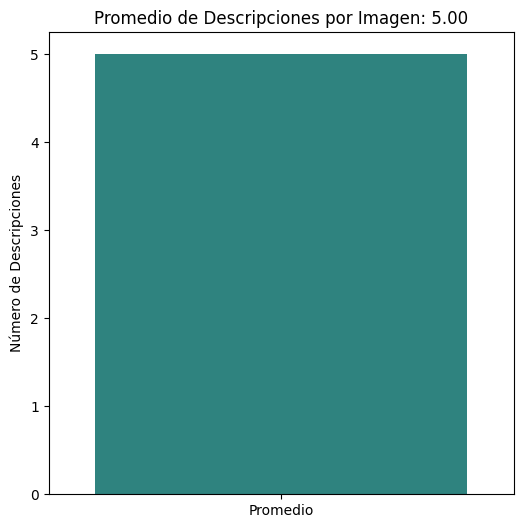

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Promedio de descripciones por imagen
description_count_per_image = data.groupby('image').size()
average_descriptions_per_image = description_count_per_image.mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=['Promedio'], y=[average_descriptions_per_image], palette='viridis')
plt.title(f'Promedio de Descripciones por Imagen: {average_descriptions_per_image:.2f}')
plt.ylabel('Número de Descripciones')
plt.show()

In [8]:
def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    return img

def display_images(temp_df, image_path=image_path):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(f"{image_path}/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")

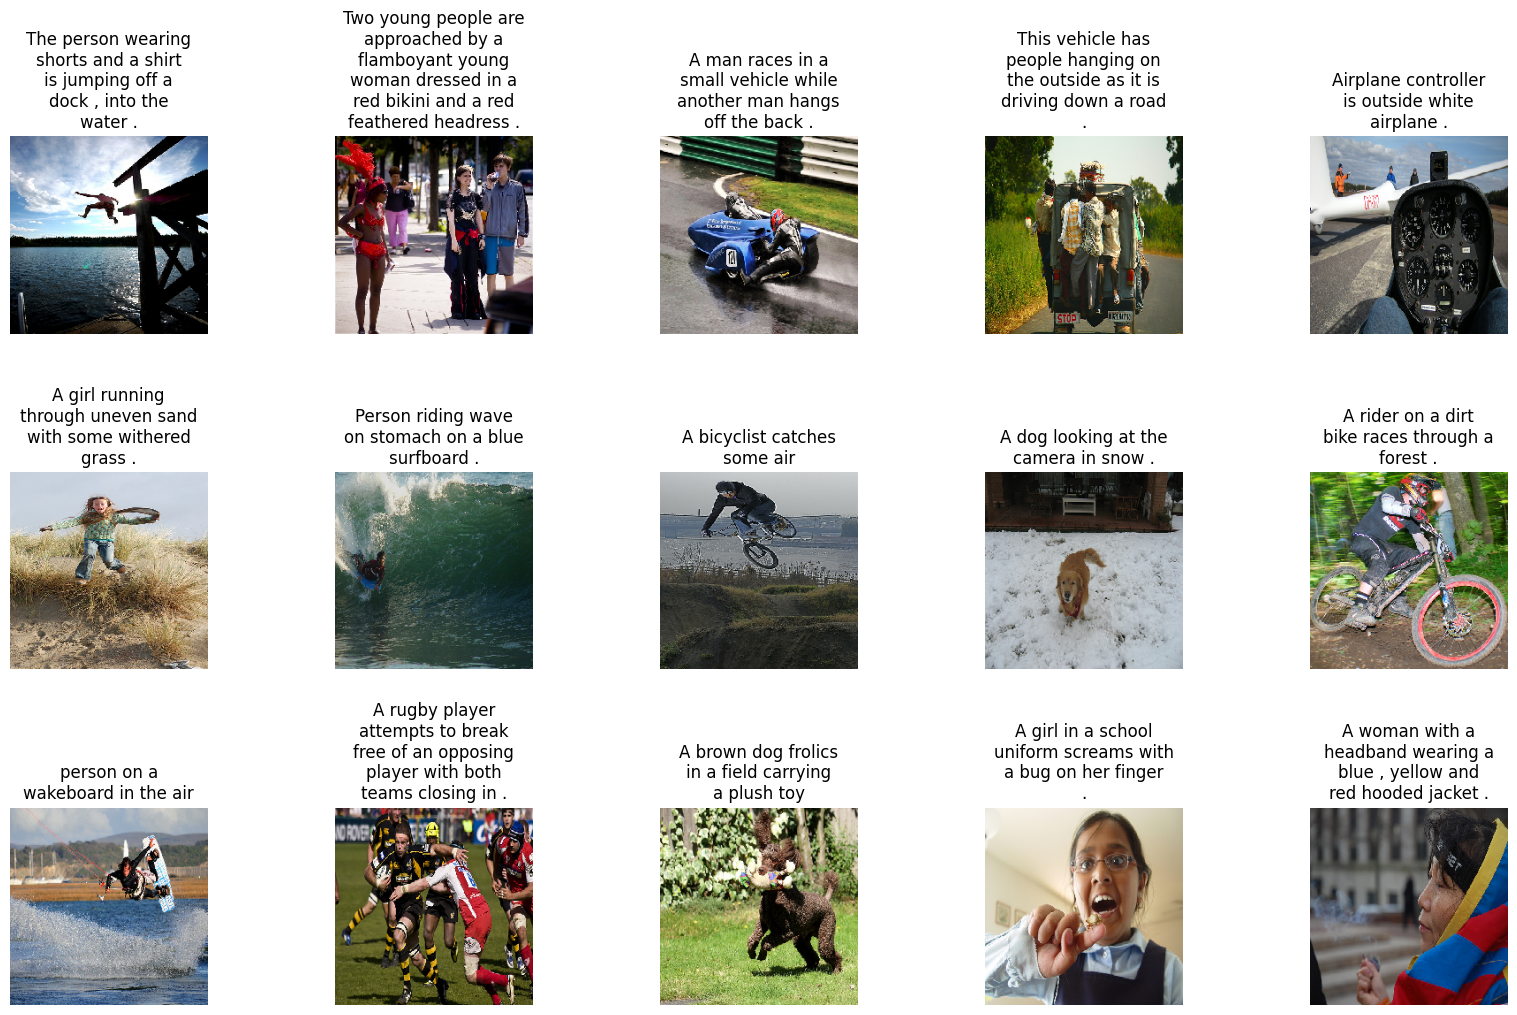

In [9]:
display_images(data.sample(15))